December 5, 2024

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**1(a) Explanation of the Choice of Dataset and Reason for Working with It.**

I chose this dataset because it directly relates to my interests in analyzing factors of career transitions and job satisfaction. In fact, the foundation will be a proper ground for investigating some of the key questions about education, job satisfaction, and professional development and more. The dataset contains a broad range of 22 diverse features, including *demographic*, *job satisfaction scores*, *skills gaps* and more. Thus, it is a nice balance between *categorical* and *numerical* data that can be used in exploratory and predictive analyses.

With its well-structured format, this dataset perfectly fits the scope of my project, allowing efficient use of Python libraries. It shall further be able to produce insightful data such as looking at how education influences salary or mentorship regarding job satisfaction. The following questions would yield proper insights on career trends and real-life problems experienced during professional development.

---



**1(b) Downloading The Data.**

In [ ]:
# Direct download link for the dataset from Google Drive
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1_rW_O2Y-cVcpdfKi_-z59H_xeEXEkAQU", on_bad_lines='skip')

**Explenation:** This code downloads a dataset from a Google Drive direct link and loads it into a pandas DataFrame named data. The on_bad_lines='skip' parameter ensures that any problematic rows in the dataset (e.g., corrupted or improperly formatted rows) are skipped during the loading process, allowing the rest of the data to be processed smoothly.

---



**1(c) Displaying The Data**

This step helps verify that the dataset was loaded correctly and aids in understanding the data layout for further analysis.

In [ ]:
# Displaying the first few rows of the dataset
data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


**Explenation:** The displayed DataFrame shows the first five rows of the dataset, with columns like "Field of Study," "Current Occupation," "Age," and "Education Level." etc. Each row represents an individual's record, and each column contains specific attributes related to their career, demographics, and job-related metrics. This step ensures the data is ready for analysis within the notebook.

---



**1(d) Number of Rows and Columns**

To determine the total number of rows and columns in the dataset.

In [ ]:
# Getting the number of rows and columns
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 38444
Number of columns: 23


**Explanation:**
This step calculates and displays the dataset's dimensions. It shows there are 38,444 rows and 23 columns, providing an overview of the dataset's size and structure.

---



### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [ ]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

**2(a) Checking For Quality Issues**

To assess the dataset for quality issues by identifying missing values, calculating their percentages, and ensuring data type consistency for better understanding and preparation for analysis.

In [ ]:
# Calculating missing values and percentage of missing values for each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Checking data types to ensure consistency
data_types = data.dtypes

# Combining missing values, missing percentage, and data types
quality_summary = pd.concat([missing_values, missing_percentage, data_types], axis=1)
quality_summary.columns = ['Missing Values', 'Missing Percentage (%)', 'Data Type']

# Displaing the combined DataFrame for an overview of data quality
quality_summary

,Missing Values,Missing Percentage (%),Data Type
Field of Study,0,0.000000,object
Current Occupation,0,0.000000,object
Age,0,0.000000,int64
Gender,0,0.000000,object
Years of Experience,0,0.000000,int64
Education Level,0,0.000000,object
Industry Growth Rate,0,0.000000,object
Job Satisfaction,0,0.000000,int64
Work-Life Balance,0,0.000000,int64
Job Opportunities,0,0.000000,int64


- **Missing Values:** Most columns are complete, except "Family Influence," which has 9,632 missing values.
- **Data Types:**
  - 6 categorical (`object`) columns (e.g., "Field of Study," "Gender").
  - 17 numerical (`int64`) columns (e.g., "Age," "Salary," "Job Satisfaction").


---



**2(b) Checking for Zero Values in Numerical Columns**

In this code, we are checking each numeric column in the dataset to count the number of "0" values. This helps identify any potentially unrealistic or faulty values (such as "0" in columns) that might indicate data quality issues.



In [ ]:
data.select_dtypes(include=['float64', 'int64']).apply(lambda col: (col == 0).sum())

,0
Age,0
Years of Experience,959
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0
Salary,0
Job Security,0
Career Change Interest,30759
Skills Gap,0
Mentorship Available,26913


**Explenation:** we retrieved the count of zero values in each numerical column of the dataset. This revealed columns with significant zero counts, such as "Years of Experience" (959 zeros) and "Career Change Interest" (30,759 zeros), which may indicate missing or unrealistic data. For other columns, like "Freelancing Experience" and "Geographic Mobility", zeros might represent valid binary responses.

---



**2(c) Count the Number of Unique Values**

To identify the number of unique values in each column of the dataset, which helps in understanding the diversity or variability of the data and informs potential transformations or encoding needs.

In [ ]:
data.nunique()

,0
Field of Study,10
Current Occupation,10
Age,40
Gender,2
Years of Experience,40
Education Level,4
Industry Growth Rate,3
Job Satisfaction,10
Work-Life Balance,10
Job Opportunities,100


**Explenation:** The findings reveal the diversity and structure of the dataset. Categorical columns like "Field of Study" and "Current Occupation" have 10 unique values, providing a manageable range for analysis. Binary columns, such as "Mentorship Available" and "Freelancing Experience," indicate simple yes/no attributes. Continuous variables like "Age" and "Years of Experience" have 40 unique values, showing a broad distribution, while "Salary" has 34,551 unique values, reflecting significant variability and precision in the data. These insights help tailor data preprocessing strategies, such as encoding categorical data, normalizing numerical values, and addressing high-variability columns like "Salary."


---





**2(d) Analyzing Summary Statistics**

To retrieve summary statistics for numerical columns, including measures like mean, standard deviation, minimum, maximum, and percentiles, to better understand the data distribution and identify potential outliers or inconsistencies.

In [ ]:
data.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


**Explenation:**

**How are the data distributed?**

The data shows a wide range in metrics like age (20–59 years), years of experience (0–39), and salary ($30,005–$199,996). Job satisfaction and work-life balance average around 5.5 on a 1–10 scale, while only 20% express interest in changing careers.

**What are some common trends?**

Most individuals report moderate satisfaction, limited career change interest, and low freelancing experience (~15%). Mentorship and certifications are available to about 30%, and geographic mobility is also low, with only 30% willing to relocate.

**What are the relationships between variables?**

Higher job satisfaction appears linked to better work-life balance and job security. Salary increases with experience, and mentorship or certifications may enhance job opportunities. Career change interest is inversely related to satisfaction and balance. These relationships require further analysis.


---



**2(e) Distribution of Key Numerical Variables: Insights into Workforce Characteristics and Job Dynamics**

This visualization presents the distribution of selected numerical variables, such as age, years of experience, salary, and career-related metrics, using box plots. The goal is to explore the range, central tendency, and variability of these variables to identify patterns, potential outliers, and their relationship to workforce characteristics and job-related factors.

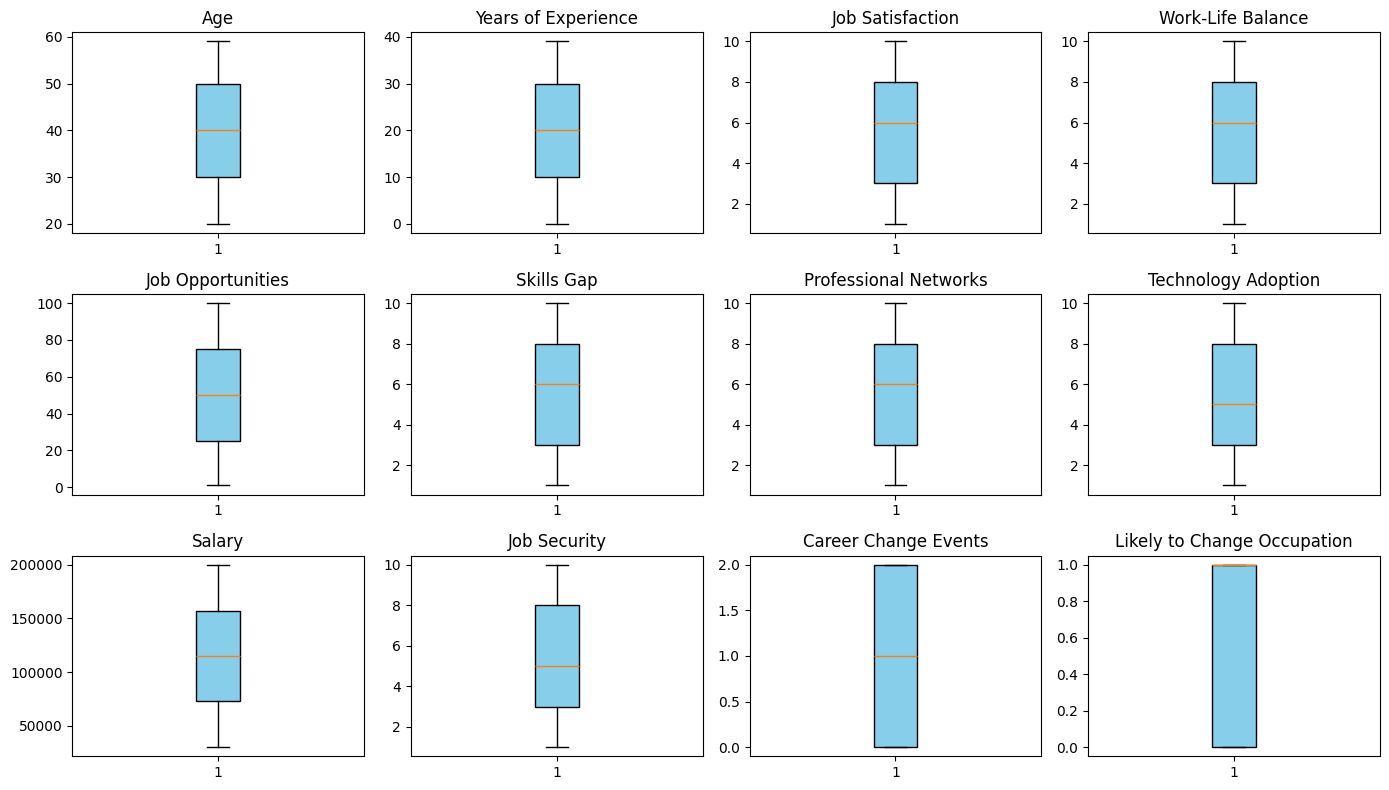

In [ ]:
# Assuming 'data' is your DataFrame
selected_columns = [
    'Age', 'Years of Experience', 'Job Satisfaction',
    'Work-Life Balance', 'Job Opportunities', 'Skills Gap',
    'Professional Networks', 'Technology Adoption',
    'Salary', 'Job Security', 'Career Change Events', 'Likely to Change Occupation'  # Added Career Change Events
]

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = -(-len(selected_columns) // n_cols)  # Ceiling division

# Plot box plots side by side
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, column in enumerate(selected_columns):
    box = axes[i].boxplot(data[column], patch_artist=True)  # Enable patch_artist for filled boxes
    axes[i].set_title(column, fontsize=12, pad=6)

    # Set colors for the boxes
    for patch in box['boxes']:
        patch.set_facecolor('skyblue')

# Hide unused subplots
for j in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Explenation:** Broad ranges in Age (median ~40), Years of Experience (median ~20), and Salary (median ~115,000) reflect diversity in the dataset. Moderate variability in Job Satisfaction (median ~6) and Work-Life Balance (median ~6) highlights differing experiences among individuals. Binary variables like Likely to Change Occupation are limited to values of 0 and 1, representing distinct categorical responses.

---





**2(f) Dropping the 'Family Influence' column**

In [ ]:
data = data.drop(columns=['Family Influence'])

**Explenation:** The "Family Influence" column is removed because 25% of its values are missing, making it unreliable for analysis. Removing it simplifies the dataset and avoids potential inaccuracies from imputation.

---



### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

**3(a) Research Questions**


1. **What factors influence the likelihood of a professional changing their occupation?**
2.   **How do job satisfaction and work-life balance correlate with salary and years of experience?**
3. **Can we use Age and Professional Networks to determine if they influence Salary?**







**3(a).1 What factors influence the likelihood of a professional changing their occupation?**

The goal is to analyze the factors that influence the likelihood of a professional changing their occupation using a Random Forest Classifier. This project focuses on identifying the most important predictors and evaluating the model's performance. I chose Random Forest because it handles non-linear relationships, provides feature importance insights, and ensures accuracy and scalability.

In [ ]:
# Define features and target
features = data[['Salary', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance',
                 'Mentorship Available', 'Certifications', 'Job Opportunities']]
target = data['Likely to Change Occupation']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
# Display accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8908830797242815


In [ ]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                 Feature  Importance
2      Job Satisfaction    0.546698
0                Salary    0.241412
6     Job Opportunities    0.090825
1   Years of Experience    0.070121
3     Work-Life Balance    0.036368
4  Mentorship Available    0.007557
5        Certifications    0.007019


**Explenation:** The model achieved 1.0 training accuracy and 0.89 test accuracy, showing strong generalization despite potential overfitting. Job Satisfaction (0.5467) and Salary (0.2414) are the most significant predictors of career change, followed by Job Opportunities (0.0908). Minor factors include Work-Life Balance (0.0364), Mentorship (0.0076), and Certifications (0.0070), highlighting job satisfaction and salary as key drivers.

---




**3(a).2 How do job satisfaction and work-life balance correlate with salary and years of experience?**

To analyze how Job Satisfaction and Work-Life Balance are influenced by Salary and Years of Experience using linear regression models.

In [ ]:
# Define features and targets
features = data[['Salary', 'Years of Experience']]
target_js = data['Job Satisfaction']
target_wlb = data['Work-Life Balance']

In [ ]:
# Split data into training and testing sets for Job Satisfaction
X_train_js, X_test_js, y_train_js, y_test_js = train_test_split(features, target_js, test_size=0.2, random_state=42)

# Split data into training and testing sets for Work-Life Balance
X_train_wlb, X_test_wlb, y_train_wlb, y_test_wlb = train_test_split(features, target_wlb, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression for Job Satisfaction
lr_js = LinearRegression()
lr_js.fit(X_train_js, y_train_js)


LinearRegression()

In [ ]:
# Predict training set values for Job Satisfaction
y_train_pred_js = lr_js.predict(X_train_js)
y_test_pred_js = lr_js.predict(X_test_js)

In [ ]:
# Train Linear Regression for Work-Life Balance
lr_wlb = LinearRegression()
lr_wlb.fit(X_train_wlb, y_train_wlb)

LinearRegression()

In [ ]:
# Predict test set values for Job Satisfaction
y_train_pred_wlb = lr_wlb.predict(X_train_wlb)
y_test_pred_wlb = lr_wlb.predict(X_test_wlb)

In [ ]:
# Display results for Job Satisfaction
print("Job Satisfaction:")
print("Coefficients:", lr_js.coef_)
print("Intercept:", lr_js.intercept_)

# Display results for Work-Life Balance
print("\nWork-Life Balance:")
print("Coefficients:", lr_wlb.coef_)
print("Intercept:", lr_wlb.intercept_)

Job Satisfaction:
Coefficients: [-2.39452952e-07 -1.12007260e-03]
Intercept: 5.542810010534974

Work-Life Balance:
Coefficients: [ 1.63838212e-07 -7.53168300e-04]
Intercept: 5.520384207607327


From this data, the results show that Salary and Years of Experience have minimal impact on predicting Job Satisfaction and Work-Life Balance, with near-zero coefficients in the linear regression model. For Job Satisfaction, the coefficients are [-2.39e-07, -1.12e-03], indicating negligible negative effects. For Work-Life Balance, the coefficients are [1.64e-07, -7.53e-04], showing a slight positive impact of salary and a minor negative effect of experience. The intercepts (~5.54 and ~5.52) represent baseline scores, suggesting other factors like Job Opportunities or Workplace Environment may be better predictors.

---





**3(a).3 Can we use Age and Professional Networks to determine if they influence Salary?**

To predict whether Age and Professional Networks influence Salary by classifying it as either above or below the median. This will be achieved using a Logistic Regression model, aiming to understand the relationship between these features and salary distribution.

In [ ]:
# Define features and target
features = data[['Age', 'Professional Networks']]  # Replace with your column names
target = (data['Salary'] > data['Salary'].median()).astype(int)  # Convert Salary to binary: Above/Below Median

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.5048284831734677
Test Accuracy: 0.5017557549746391

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52      3822
           1       0.51      0.46      0.48      3867

    accuracy                           0.50      7689
   macro avg       0.50      0.50      0.50      7689
weighted avg       0.50      0.50      0.50      7689



**Explenation:** The Logistic Regression model shows poor performance with a 50.48% training accuracy and 50.18% test accuracy, indicating it is close to random guessing. Both precision and recall are around 0.50 for each class, with slightly better recall for the below median salary class. The F1-scores are low, suggesting a poor balance between precision and recall. These results suggest that Age and Professional Networks alone are not strong predictors of salary categories. To improve performance, more relevant features and more complex models should be considered.

---



### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


**4(a) Key Factors Driving Career Change Decisions: Insights from Predictive Analysis**

1. Bar Chart: Displays the relative importance of features, such as Job Satisfaction and Salary, in predicting the target variable. This highlights the features that have the highest and lowest impact.

2. Cumulative Importance Plot: Shows how feature importance accumulates as more features are added. This helps identify the most significant features contributing to the majority of the predictive power.

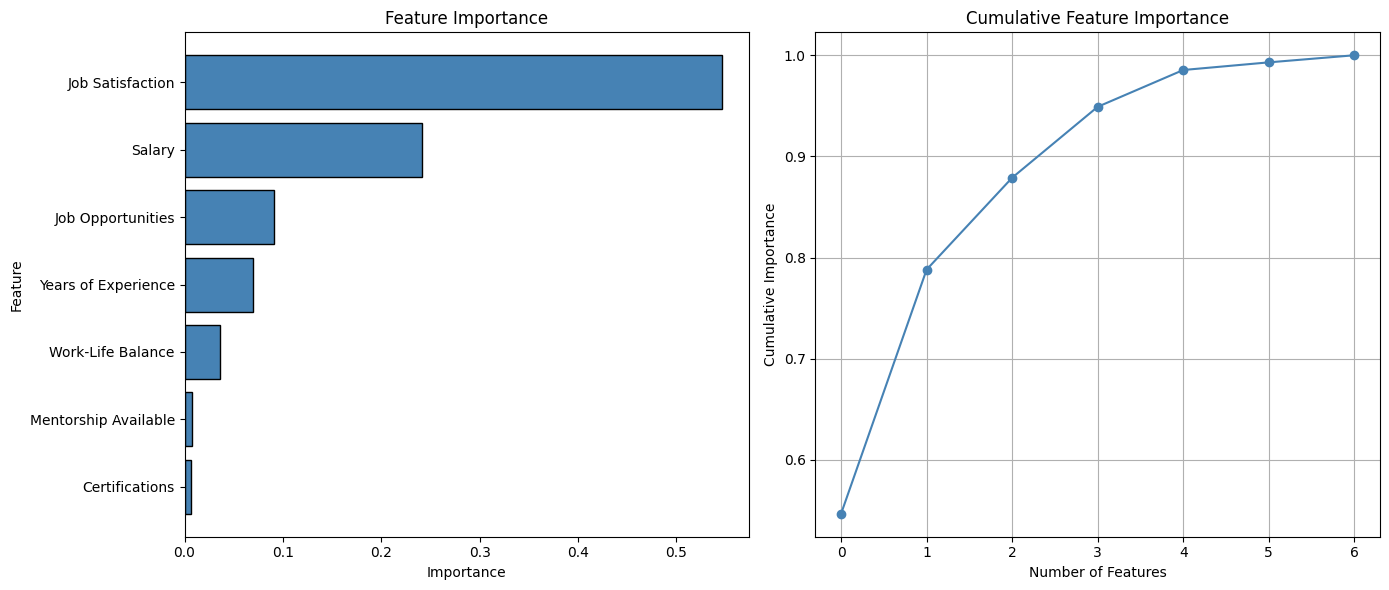

In [ ]:
# Data for feature importance
features = ['Job Satisfaction', 'Salary', 'Job Opportunities', 'Years of Experience',
            'Work-Life Balance', 'Mentorship Available', 'Certifications']
importance = [0.546698, 0.241412, 0.090825, 0.070121, 0.036368, 0.007557, 0.007019]

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for feature importance on the first subplot
axes[0].barh(features, importance, color='steelblue', edgecolor='black')
axes[0].set_title('Feature Importance')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].invert_yaxis()  # Invert to show highest importance at the top

# Cumulative feature importance on the second subplot
cumulative_importance = [sum(importance[:i+1]) for i in range(len(importance))]
axes[1].plot(cumulative_importance, marker='o', color='steelblue')
axes[1].set_title('Cumulative Feature Importance')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Inference:** Job Satisfaction is the most influential feature, contributing 54.67% to predictions, followed by Salary (24.14%) and Job Opportunities (9.08%). Other features like Years of Experience (7.01%), Work-Life Balance (3.64%), Mentorship Available (0.76%), and Certifications (0.70%) have minimal impact. The cumulative plot shows that the top three features account for 85% of predictive power.

**Limitations:** These findings are based on the dataset and may not generalize across industries. The analysis assumes feature independence and linearity, potentially missing complex relationships. External factors like workplace culture are not included.

**Recommendations:** Future research should explore non-linear models, include more features, and validate findings across diverse datasets. Examining feature interactions may provide deeper insights.

---



**4(b) Findings on the Correlation Between Job Satisfaction, Work-Life Balance, Salary, and Experience**

The Heatmap illustrating the coefficients of Job Satisfaction and Work-Life Balance with respect to Salary and Years of Experience.

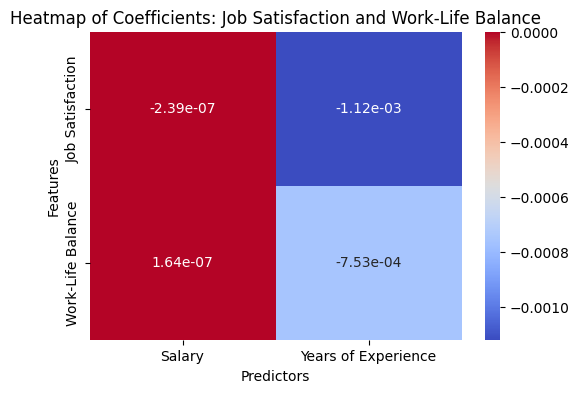

In [ ]:
# Data for coefficients
features = ['Job Satisfaction', 'Work-Life Balance']
coefficients = [[-2.39452952e-07, -1.12007260e-03], [1.63838212e-07, -7.53168300e-04]]  # Coefficients for features

# Create a heatmap-friendly array
coefficients_array = np.array(coefficients)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(coefficients_array, annot=True, cmap='coolwarm', fmt=".2e",
            xticklabels=['Salary', 'Years of Experience'], yticklabels=features, cbar=True)
plt.title("Heatmap of Coefficients: Job Satisfaction and Work-Life Balance")
plt.xlabel("Predictors")
plt.ylabel("Features")
plt.show()

**Inference:** The heatmap shows that Job Satisfaction and Work-Life Balance have minimal correlation with Salary and Years of Experience, with coefficients near zero (e.g., -2.39e-07 and 1.64e-07 for Salary; -1.12e-03 and -7.53e-04 for Experience). The intercepts (~5.54 and ~5.52) reflect baseline levels with limited impact from these variables.

**Limitations:** These findings are specific to the dataset and assume linear relationships, which may not capture complex interactions. External factors like workplace policies are not included, limiting generalizability.

**Recommendations:** Future analyses could include more variables, explore non-linear models, or validate findings across broader datasets for deeper insights.

---



**4(c) Confusion Matrix and Metrics Comparison: Exploring the Influence of Age and Professional Networks on Salary**

We will present a Confusion Matrix and a Bar Chart to show the model's performance in predicting "Below Median" and "Above Median" salaries, highlighting classification accuracy, precision, recall, and F1-scores.

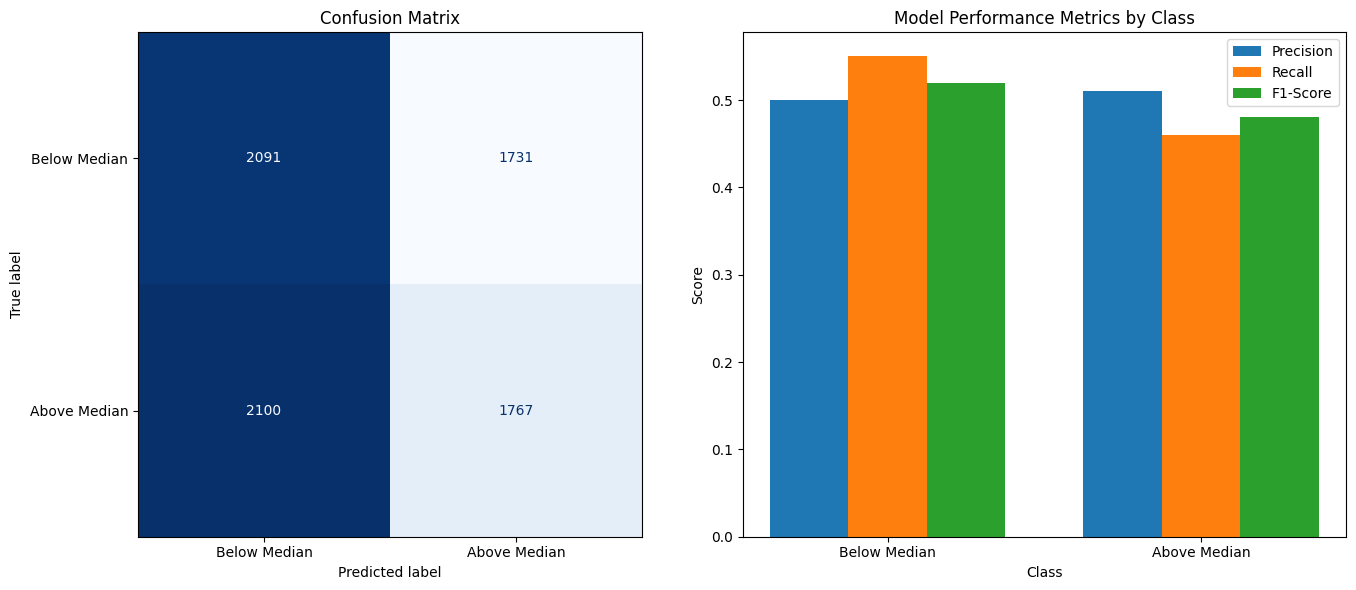

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below Median", "Above Median"])

# Metrics for Bar Chart
metrics = {
    "Precision": [0.50, 0.51],
    "Recall": [0.55, 0.46],
    "F1-Score": [0.52, 0.48]
}
classes = ["Below Median", "Above Median"]

x = np.arange(len(classes))
width = 0.25

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Confusion Matrix on the first subplot
disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix")

# Plot Bar Chart on the second subplot
for i, (metric, values) in enumerate(metrics.items()):
    axes[1].bar(x + i * width, values, width, label=metric)

axes[1].set_title("Model Performance Metrics by Class")
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(classes)
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Score")
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Inference:** The findings reveal the performance of the Logistic Regression model in predicting "Below Median" and "Above Median" salaries based on Age and Professional Networks. The Confusion Matrix shows true and false classifications, with 2091 "Below Median" and 1767 "Above Median" salaries correctly predicted, while 1731 and 2100 were misclassified, respectively. The Bar Chart visualizes the precision, recall, and F1-score metrics, indicating consistent performance across both classes, with precision at ~0.50, recall slightly higher for "Below Median" at 0.55, and an overall F1-score near 0.50.

**Limitations:** These results are specific to the dataset and assume linear relationships, which may not capture more complex patterns. Misclassification rates highlight areas where additional features or advanced models might improve accuracy. The lack of external factors, such as economic or workplace-related influences, limits broader applicability.

**Recommendations:** To enhance the findings, future analysis could include non-linear models, a larger set of features, or external variables to improve prediction accuracy. Validating these results on diverse datasets would also increase generalizability.